In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#reading the dataset 
train = pd.read_csv(r'C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\car_mileage.csv')
train.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [31]:
train.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
Scaling_feature=[feature for feature in train.columns ]
Scaling_feature

['mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb',
 'anomaly_score']

In [66]:
scaler.fit(train)

MinMaxScaler()

In [67]:
data_test=pd.DataFrame(scaler.transform(train[Scaling_feature]),columns=Scaling_feature)
scaled=(scaler.transform(train))
data_test.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,anomaly_score
0,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571,1.0
1,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571,1.0
2,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000,1.0
3,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000,1.0
4,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857,1.0


<AxesSubplot:ylabel='Frequency'>

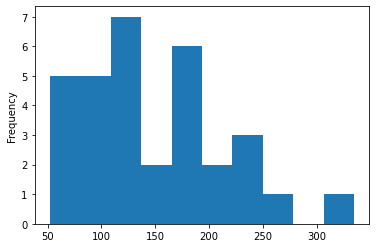

In [68]:
train['hp'].plot.hist()

C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

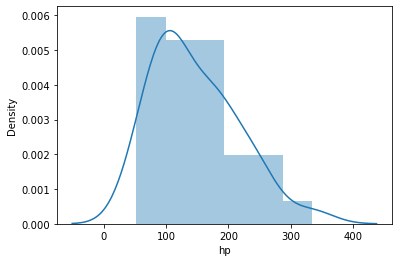

In [69]:
sns.distplot(train['hp'])

In [70]:
corr_table=train.corr()
corr_table.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,anomaly_score
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.568425
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.321317
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.329815
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.310634
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.271534


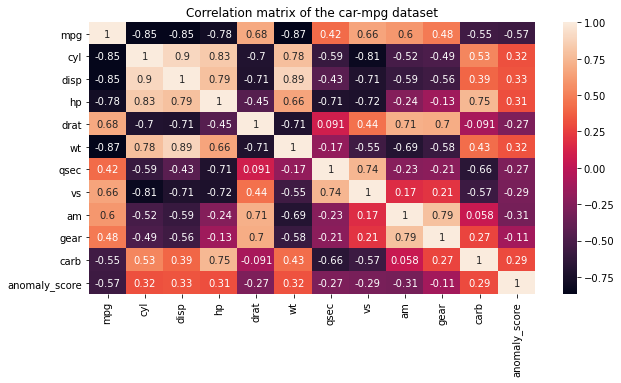

In [50]:
plt.figure(figsize=(10,5))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show() 

In [53]:
import statsmodels.formula.api as smf

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(train):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = train.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(train.values,i) for i in range(train.shape[1])]
    return VIF_Scores
train1 = train.iloc[:,1:]
vif_scores(train1)

,Independent Features,VIF Scores
0,cyl,112.646899
1,disp,99.569961
2,hp,56.397513
3,drat,132.513266
4,wt,183.124110
5,qsec,317.949630
6,vs,8.780667
7,am,8.286391
8,gear,126.754417
9,carb,32.409886


In [55]:

var1=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'am', 'vs', 'gear', 'carb']
var2=['cyl', 'disp', 'hp', 'drat', 'wt', 'am', 'vs', 'gear', 'carb']
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(train):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = train.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(train.values,i) for i in range(train.shape[1])]
    return VIF_Scores
train1 = train[var2]
vif_scores(train1)


,Independent Features,VIF Scores
0,cyl,82.354536
1,disp,80.900730
2,hp,55.580066
3,drat,98.927120
4,wt,95.561218
5,am,7.234124
6,vs,6.873550
7,gear,100.710276
8,carb,21.840156


In [56]:
var3=[ 'disp', 'hp', 'drat',  'am', 'vs',  'carb']
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(train):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = train.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(train.values,i) for i in range(train.shape[1])]
    return VIF_Scores
train1 = train[var3]
vif_scores(train1)

,Independent Features,VIF Scores
0,disp,27.916047
1,hp,41.786037
2,drat,29.900962
3,am,4.634702
4,vs,4.933343
5,carb,13.763708


In [58]:
test1=smf.ols('hp~-1+cyl+disp+mpg+drat+wt+qsec+am+vs+gear+carb',train).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     hp   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              126.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    4.77e-17
Time:                        12:50:14   Log-Likelihood:                         -143.03
No. Observations:                  32   AIC:                                      306.1
Df Residuals:                      22   BIC:                                      320.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           11.2256      7.075      1.587      0.127      -3.447      25.898
disp           0.4424      0.146      3.026      0.006       0.139       0.746
mpg           -1.9504      2.035     -0.958      0.348      -6.171       2.270
drat          -1.8757     14.477     -0.130      0.898     -31.900      28.149
wt           -28.1202     18.880     -1.489      0.151     -67.275      11.035
qsec           0.4447      5.114      0.087      0.931     -10.161      11.050
am            11.2212     19.980      0.562      0.580     -30.214      52.657
vs            25.1839     19.426      1.296      0.208     -15.103      65.471
gear           9.7267     13.139      0.740      0.467     -17.523      36.976
carb          18.5335      6.879      2.694      0.013       4.266      32.801
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                1.923
Skew:                          -0.084   Prob(JB):                        0.382
Kurtosis:                       1.811   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hp'>

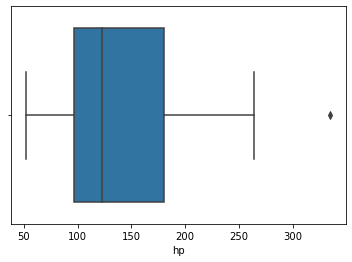

In [59]:
sns.boxplot(train['hp'])


C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='disp'>

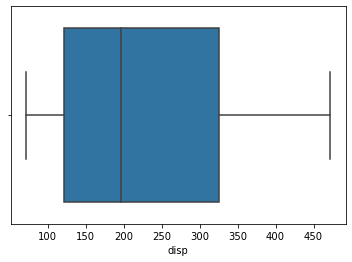

In [62]:
sns.boxplot(train['disp'])

C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cyl'>

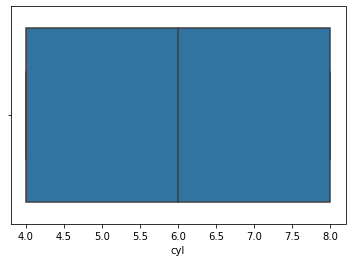

In [61]:
sns.boxplot(train['cyl'])

C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

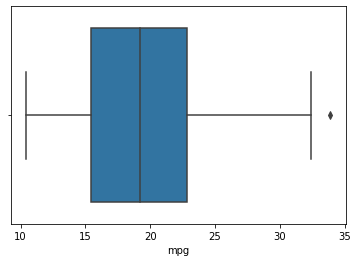

In [60]:
sns.boxplot(train['mpg'])

C:\Users\2000139\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wt'>

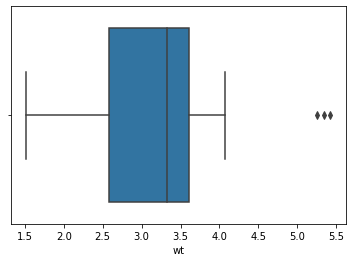

In [23]:
sns.boxplot(train['wt'])